In [43]:
# import pands, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

To load the data:

In [44]:
df_social= pd.read_csv("https://raw.githubusercontent.com/Jimmynam0103/Hashtag_Engagement/refs/heads/main/data/sentimentdataset.csv")

In [45]:
df_social.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [46]:
df_social.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


In [47]:
df_social = df_social.applymap(lambda x: x.strip() if isinstance(x,str) else x)

/var/folders/fl/1v09j2_57fg6drj48nv618w00000gn/T/ipykernel_96901/2778840378.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_social = df_social.applymap(lambda x: x.strip() if isinstance(x,str) else x)


In [48]:
df_social['Timestamp'] = pd.to_datetime(df_social['Timestamp'], errors='coerce')
numeric_cols = ['Retweets', 'Likes', 'Year', 'Month', 'Day', 'Hour']
df_social[numeric_cols] = df_social[numeric_cols].apply(pd.to_numeric, errors='coerce')
df_social


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [49]:
df_social.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0.1  732 non-null    int64         
 1   Unnamed: 0    732 non-null    int64         
 2   Text          732 non-null    object        
 3   Sentiment     732 non-null    object        
 4   Timestamp     732 non-null    datetime64[ns]
 5   User          732 non-null    object        
 6   Platform      732 non-null    object        
 7   Hashtags      732 non-null    object        
 8   Retweets      732 non-null    float64       
 9   Likes         732 non-null    float64       
 10  Country       732 non-null    object        
 11  Year          732 non-null    int64         
 12  Month         732 non-null    int64         
 13  Day           732 non-null    int64         
 14  Hour          732 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(

In [ ]:
df_social = df_social.drop_duplicates()
df_social = df_social.drop_duplicates(subset=['Text', 'Sentiment', 'Hashtags'])


In [51]:
df_social.info()


<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0.1  706 non-null    int64         
 1   Unnamed: 0    706 non-null    int64         
 2   Text          706 non-null    object        
 3   Sentiment     706 non-null    object        
 4   Timestamp     706 non-null    datetime64[ns]
 5   User          706 non-null    object        
 6   Platform      706 non-null    object        
 7   Hashtags      706 non-null    object        
 8   Retweets      706 non-null    float64       
 9   Likes         706 non-null    float64       
 10  Country       706 non-null    object        
 11  Year          706 non-null    int64         
 12  Month         706 non-null    int64         
 13  Day           706 non-null    int64         
 14  Hour          706 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(6), o

Text-Processing:

To ensure that the hashtags are split into lists:

In [52]:
df_social['Hashtags'] = df_social['Hashtags'].str.replace('#', '', regex=False)
df_social['HashtagList'] = df_social['Hashtags'].str.lower().str.split(r'\s+')


In [53]:
df_social

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,HashtagList
0,0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,Nature Park,15.0,30.0,USA,2023,1,15,12,"[nature, park]"
1,1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,Traffic Morning,5.0,10.0,Canada,2023,1,15,8,"[traffic, morning]"
2,2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,Fitness Workout,20.0,40.0,USA,2023,1,15,15,"[fitness, workout]"
3,3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,Travel Adventure,8.0,15.0,UK,2023,1,15,18,"[travel, adventure]"
4,4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,Cooking Food,12.0,25.0,Australia,2023,1,15,19,"[cooking, food]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,ScienceFairWinner HighSchoolScience,20.0,39.0,UK,2017,8,18,18,"[sciencefairwinner, highschoolscience]"
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,SurpriseCelebration HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14,"[surprisecelebration, highschoolfriendship]"
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,CommunityGiving HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17,"[communitygiving, highschoolphilanthropy]"
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,CulturalCelebration HighSchoolUnity,21.0,43.0,UK,2020,2,29,20,"[culturalcelebration, highschoolunity]"


-----HERE -----
We can export the cleaned file and get ready for exploratory analysis.
Can now import the cleaned file in another workbook to perform EDA.

/var/folders/fl/1v09j2_57fg6drj48nv618w00000gn/T/ipykernel_96901/3298845910.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df_social, palette='Set2')


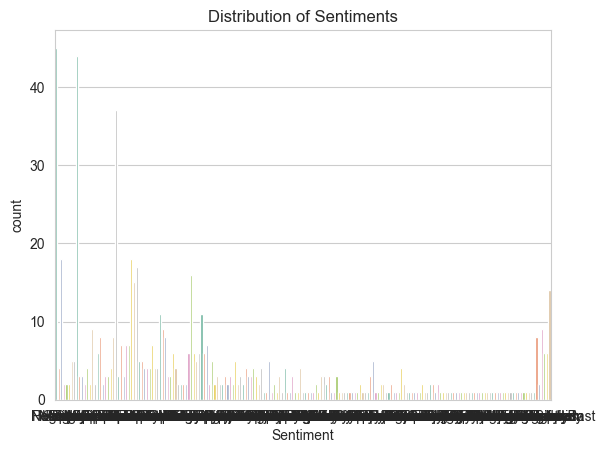

In [54]:
sns.countplot(x='Sentiment', data=df_social, palette='Set2')
plt.title("Distribution of Sentiments")
plt.show()

In [ ]:
positive_words = {'positivevibes', 'positive', 'relief', 'joy','excitement', 'contentment', 'gratitude', 'happy', 'love', 'fitness', 'inspiration', 'nature', 'cozy', 'success', 'future', 'workfromhome', 'kindness', 'happiness', 'calmness', 'admiration', 'affection','adoration', 'excitement', 'empowerment', }
negative_words = {'bad', 'sad','hate', 'embarrassed', 'traffic', 'sickday', 'winterblues', 'debate', 'politics', 'stress', 'angry', 'badluckday','badday','injustice', 'fear','disgust','disappointed', 'bitterlesson','confusion', 'shame', 'anger', 'sadness', 'disgust' }
